## Imports

In [1]:
# utils
import os

import matplotlib.pyplot as plt

# basics
import pandas as pd

# viz
import seaborn as sns

## Reading datasets

In [2]:
root = os.getcwd()
path_results = "results"
path_data = "data"
path_pij = "pij"
path_metrics = "metrics"
path_corr = "correlation"
path_labels = "labels"

path_url_results = os.path.join(root, path_results)
path_url_data = os.path.join(root, path_data)
names = [
    i
    for i in os.listdir(path_url_data)
    if os.path.isdir(os.path.join(path_url_data, i))
]

In [3]:
path_url_correlation = {}
for name in names:
    url = os.path.join(path_url_results, name, path_corr)
    if not os.path.exists(url):
        os.makedirs(url)
    path_url_correlation[name] = url

In [4]:
path_urls_data = [
    os.path.join(root, path_data, name, name + ".csv") for name in names
]
path_urls_pij_true = [
    os.path.join(path_url_results, i, path_pij, "pij_true.csv") for i in names
]
path_urls_pij_pred = [
    os.path.join(path_url_results, i, path_pij, "pij_pred.csv") for i in names
]
path_urls_metrics = [
    os.path.join(path_url_results, i, path_metrics, "metrics.csv")
    for i in names
]
path_urls_labels = [
    os.path.join(path_url_results, i, path_labels, "labels.csv") for i in names
]
path_urls_corr = [
    os.path.join(path_url_results, i, path_corr, i + "_corr_spearman.csv")
    for i in names
]
path_urls_to_corr = [
    os.path.join(
        path_url_results, i, path_corr, "data_" + i + "_to_corr_spearman.csv"
    )
    for i in names
]

In [5]:
data = {name: pd.read_csv(url) for url, name in zip(path_urls_data, names)}

In [6]:
data_metrics = {
    name: pd.read_csv(url, index_col=0)
    for url, name in zip(path_urls_metrics, names)
}

In [7]:
def reader(URL):
    """Read the ur of the dataset
    Parameters
    -----------
    URL: str.
        String with the url

    Return
    -----------
    dataframe:  Return the dataframe read for url.
    """
    try:
        return pd.read_csv(URL, index_col=0)
    except:
        return None


data_labels = {name: reader(url) for url, name in zip(path_urls_labels, names)}

## Generate correlations

In [8]:
data_metrics["varied"]

,abilities,v_measure,mutual_info,adjusted_rand_score,calinski_harabasz,davies_bouldin,silhouette
optimal_clustering,0.517578,NaN,NaN,NaN,NaN,NaN,NaN
kmeans_n_clusters_3,0.514564,0.741639,0.806348,0.740099,1549.896239,0.612561,0.639911
mean_shift_,0.514410,0.777742,0.848961,0.787021,1528.360457,0.633359,0.631693
kernel_kmeans_n_clusters_4_kernel_gak_random_state_0,0.513986,0.747516,0.888109,0.737154,1565.827925,0.688795,0.623334
kernel_kmeans_n_clusters_3_kernel_gak_random_state_0,0.513871,0.760220,0.828263,0.763480,1498.499558,0.654248,0.630838
spectral_clustering_n_clusters_3_eigen_solver_arpack_affinity_nearest_neighbors,0.513504,0.799647,0.873252,0.803486,1505.479764,0.616940,0.632016
kmeans_n_clusters_4,0.513468,0.766434,0.914395,0.756637,1575.241317,0.699061,0.623666
kernel_kmeans_n_clusters_6_kernel_gak_random_state_0,0.509012,0.737750,0.946143,0.741697,1210.036907,0.877501,0.562447
dbscan_eps_0_2_min_samples_2,0.503120,0.742014,1.016570,0.796515,190.057142,2.000116,0.276770
kmeans_n_clusters_5,0.499226,0.667874,0.876763,0.600596,1416.996455,0.848169,0.516993


In [9]:
correlation = {}
for (name, metrics_data), url, url2 in zip(
    data_metrics.items(), path_urls_corr, path_urls_to_corr
):
    data_corr = metrics_data.dropna().copy()
    data_corr.to_csv(url2)
    correlation[name] = data_corr.corr(method="spearman")
    correlation[name].to_csv(url)
del correlation["no_structure"]

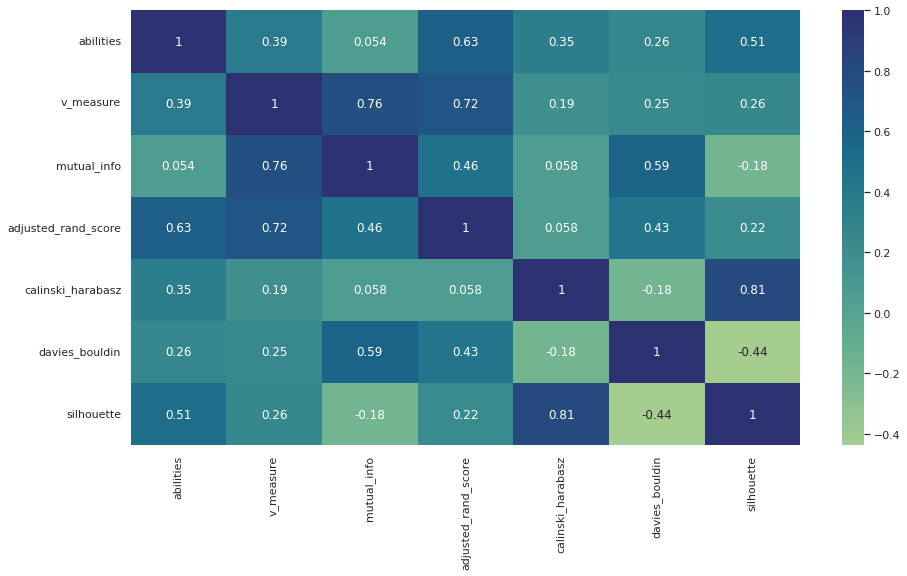

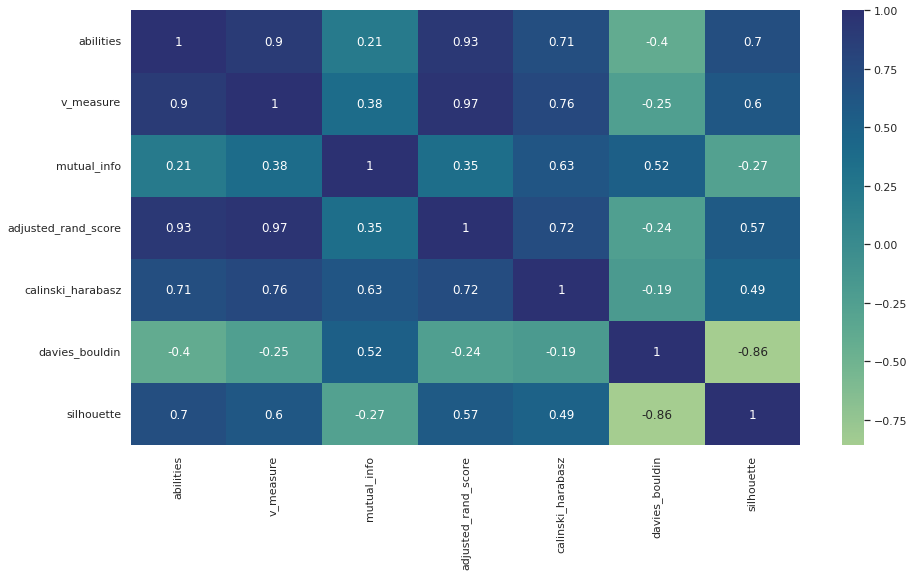

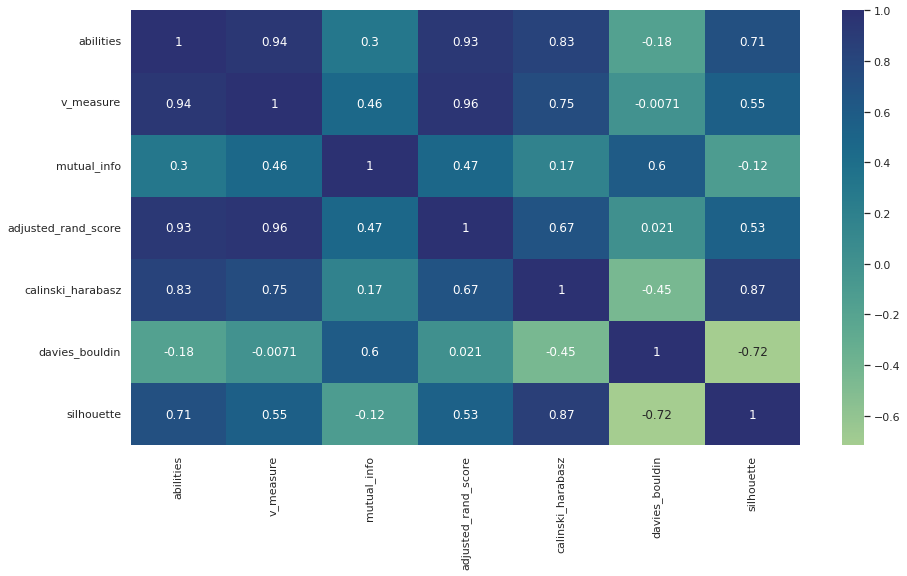

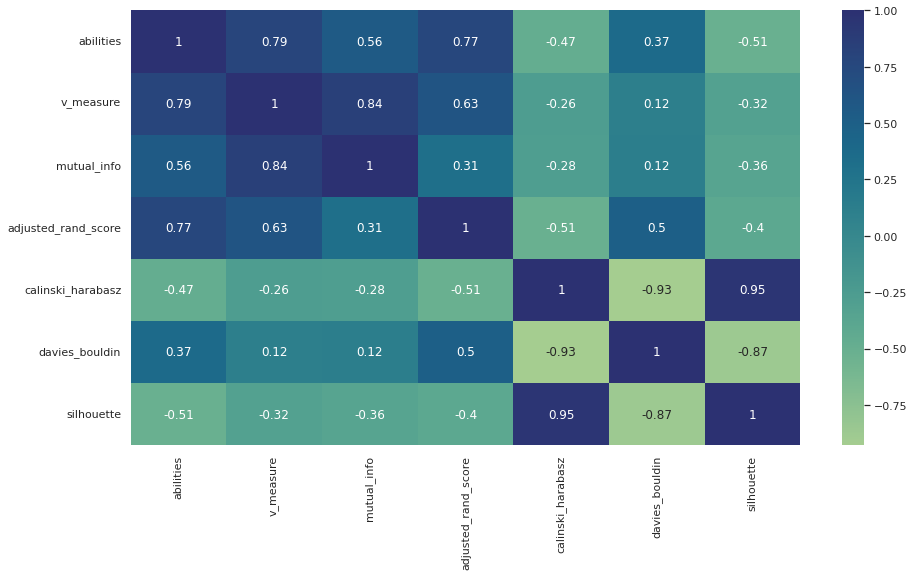

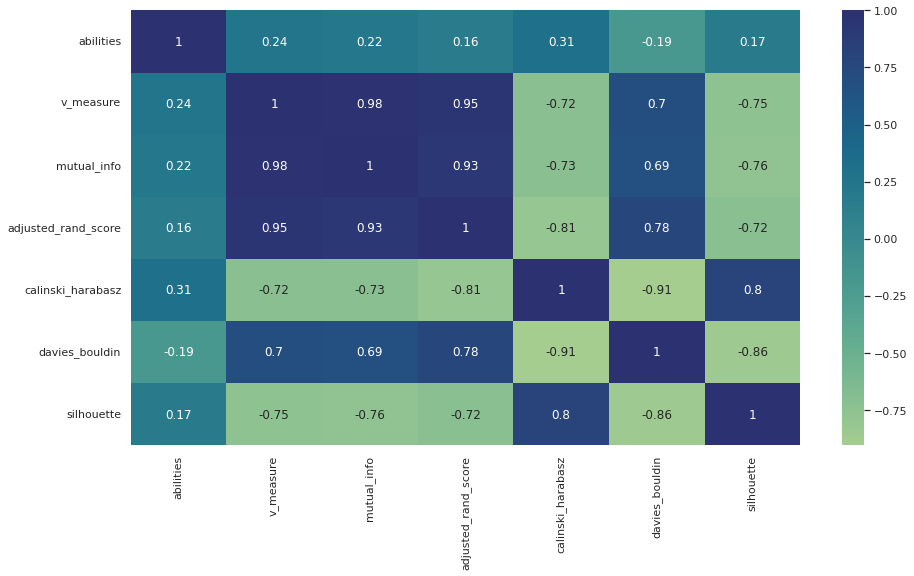

In [10]:
for name, corr_data in correlation.items():
    url = os.path.join(
        path_url_results, name, path_corr, name + "_corr_spearman.png"
    )
    plt.figure(figsize=(15, 8))
    sns.set(font_scale=1)
    sns.heatmap(corr_data, annot=True, cmap="crest")
    plt.savefig(url)

## Generate table results

In [11]:
tmp = {}
for name, corr_data in correlation.items():
    # if i != 'no_structure':
    tmp[name] = corr_data.reset_index().rename(columns={"index": "metrics"})
    tmp[name].insert(0, "dataset", [name] * tmp[name].shape[0])
tmp = pd.concat(list(tmp.values()), ignore_index=True)

In [12]:
tmp = tmp[
    ~tmp.metrics.str.contains("abilities")
]  # .groupby(['dataset', 'metrics']).mean()

In [13]:
tmp_groupby = tmp.groupby(['dataset','metrics']).mean()[['abilities']]

## Correlation for each dataset with abilities

In [14]:
data_unique = pd.DataFrame(
    columns=correlation.keys(), index=correlation["aniso"].columns[1:]
)

In [15]:
for name, corr_data in correlation.items():
    if name != "no_structure":
        data_unique[name] = (
            corr_data.drop(corr_data.columns[1:], axis=1)
            .drop(["abilities"], axis=0)
            .rename(columns={"abilities": name})
        )

In [16]:
data_unique.columns = data_unique.columns.str.replace("_", " ").str.title()
data_unique.rename(
    index={
        "v_measure": "$v$",
        "calinski_harabasz": "$CH$",
        "silhouette": "$S$",
        "mutual_info": "$MI$",
        "adjusted_rand_score": "$ARI$",
        "davies_bouldin": "$DB$",
    },
    inplace=True,
)

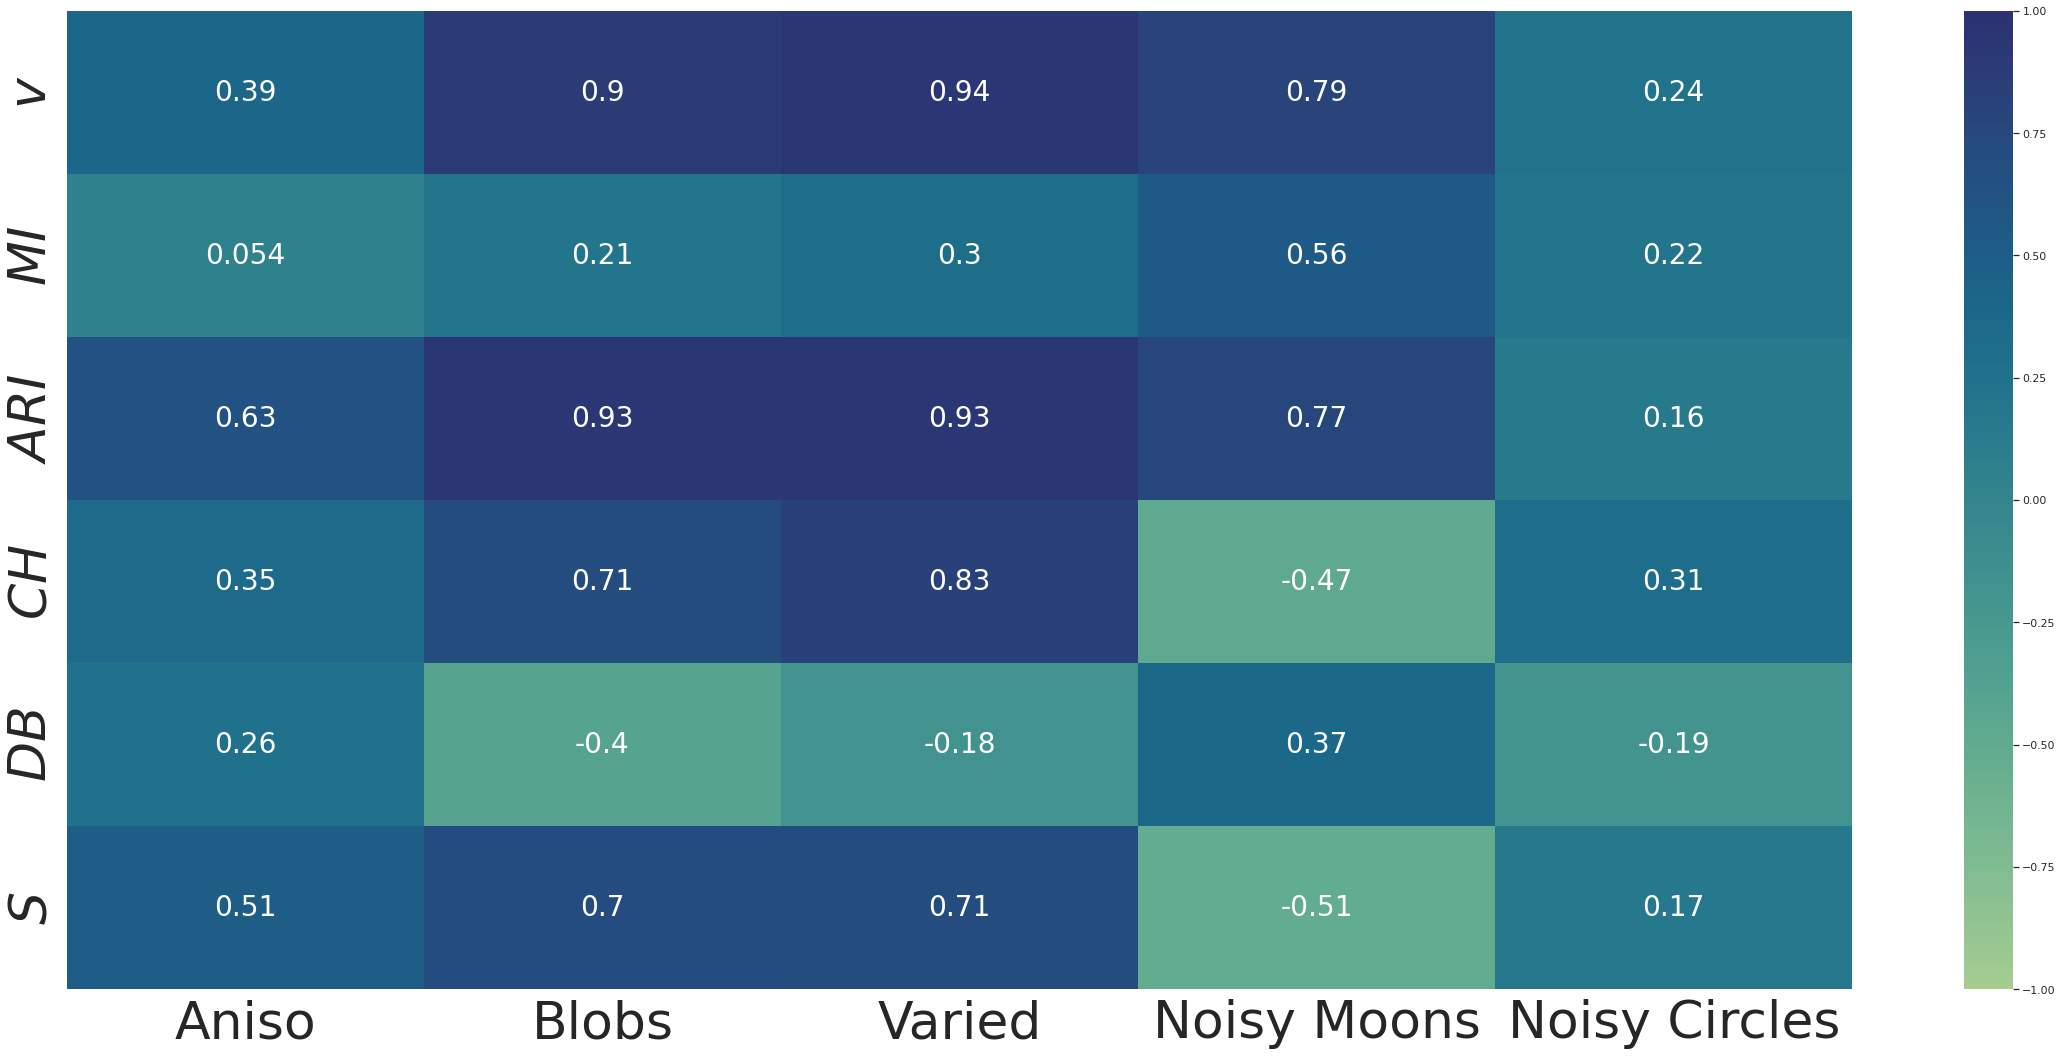

In [17]:
plt.figure(figsize=(40, 18))
ax = sns.heatmap(
    data_unique,
    annot=True,
    cmap="crest",
    vmin=-1,
    vmax=1,
    annot_kws={"size": 28},
)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=52)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=52)
plt.savefig(
    os.path.join(path_url_results, "abilities_corr_spearman.eps"), format="eps"
)